## Task 1: Prepare two test datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix

%matplotlib inline

### Creating a small datase of 6 datapoints

The K-means clustering is used to find groups within the unlabelled data.To implement K Means clustering on paper, I am using s simple 2D dataset of 6 samples. It will be easy to calculate the centroids, and the result is predictable for this small dataset. 

In [2]:
A = np.array([[4, 8],[5, 5], [4, 6],[7, 8], [8, 11], [8, 9]])
A

array([[ 4,  8],
       [ 5,  5],
       [ 4,  6],
       [ 7,  8],
       [ 8, 11],
       [ 8,  9]])

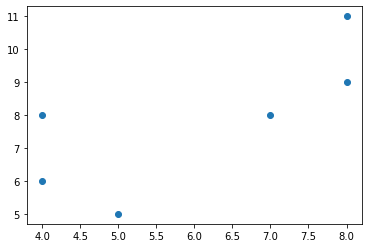

In [3]:
plt.scatter(A[:,0],A[:,1])
plt.show()



### Large dataset - Iris Dataset

I willbe using the iris dataset  which is included in scikit-learn as the large dataset.

In [4]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Task 3: Create a test harness

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)


KMeans(n_clusters=3)

In [7]:
import unittest
from math import sqrt
from sklearn.cluster import KMeans
from scipy.spatial import distance


class centroid():
    
    def min_distance(X,centroids):
        p = X.shape[0]
        idx = np.zeros(p)
        for i in range (p):
            distances = np.linalg.norm(X[i]-centroids, axis=1)  # calculates the distance from centroids
            min_dist = np.argmin(distances)  # selects the minimum distance
        return min_dist
    
    def find_centroids(X, centroids): 
        p = X.shape[0] 
        k = centroids.shape[0]
        idx = np.zeros(p)
        for i in range (p):
            distances = np.linalg.norm(X[i]-centroids, axis=1)
            min_dist = np.argmin(distances)
            idx[i] = min_dist
        return idx
    
    def compute_centroids(X, idx, k):
        p, q = X.shape
        centroids = np.zeros((k, q))
        for i in range(k):
            centroids[i] = np.mean(X[idx.ravel() == i], axis = 0) # Recalculates the centroids
        return centroids
    
    
class test_kmeans_clustering(unittest.TestCase):
    
#Unit Testing
    #Distance from centroid to itself
    def test_min_distance(self):
        centroids = np.array([[0,0]])
        X = np.array([[0,0]])
        self.assertEqual(centroid.min_distance(X,centroids), 0)
        
    #Multiple point Single cluster
    def test_min_distance(self):
        centroids = np.array([[1, 1]])
        X = np.array([[0,1],[2,2],[3,2]])
        self.assertEqual(centroid.min_distance(X,centroids), 1)
        
    #two cluster centres
    def test_min_distance(self):
        centroids = np.array([[1, 1],[2,2]])
        X = np.array([[0,1],[2,1],[3,2]])
        self.assertEqual(centroid.min_distance(X,centroids), 1)
        
    #Single cluster centre, tests if the datapoints are assigned to the right cluster  
    def test_find_centroids(self):
        centroids = np.array([[1, 1]])
        X = np.array([[0,1],[2,3]])
        kmeans = KMeans(n_clusters=1, max_iter=5)
        kmeans = kmeans.fit(X)
        self.assertTrue((centroid.find_centroids(X,centroids) == kmeans.cluster_centers_).any())
        
    #two cluster centres, tests if the datapoints are assigned to the right cluster
    def test_find_centroids(self):
        centroids = np.array([[1, 1],[2,2]])
        X = np.array([[0,1],[2,3]])
        kmeans = KMeans(n_clusters=2, max_iter=5)
        kmeans = kmeans.fit(X)
        self.assertTrue((centroid.find_centroids(X,centroids) == kmeans.cluster_centers_).any())
        
    def test_compute_centroids(self):
        k = 1
        centroids = np.array([[1, 1]])
        X = np.array([[0,1],[2,1],[3,3]])
        p, q = X.shape
        idx = np.zeros(p)
        centroid.compute_centroids(X,idx,k)
        kmeans = KMeans(n_clusters=1, max_iter=5)
        kmeans = kmeans.fit(X)
        self.assertTrue((centroid.compute_centroids(X,idx,k) == kmeans.cluster_centers_).any())
      
    
# Integration Testing        

    def test_integration_test(self):
        X = np.array([[0,1],[2,3]])
        X1 = np.array([[0,1],[2,1],[3,3],[3,4]])
        centroids = np.array([[1, 1],[2,2]])
        k1 = 1
        p, q = X1.shape
        idx = np.zeros(p)
        k = centroids.shape[0]
        kmeans = KMeans(n_clusters=2, max_iter=50)
        kmeans = kmeans.fit(X)
        self.assertEqual(centroid.min_distance(X,centroids), 1)
        self.assertTrue((centroid.find_centroids(X,centroids) == kmeans.cluster_centers_).any())
        self.assertTrue((centroid.compute_centroids(X1,idx,k1) == kmeans.cluster_centers_).any())
        

if __name__ == '__main__':
    unittest.main(argv=['this-is-ignored'], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.227s

OK


## Task 4: k-means clustering in Python

Now that we have the functions to implement the KMeans clustering algorithm, let us implement that and classify the iris dataset into 3 clusters. 

#### Running K-Means

In [8]:
def run_k_means(X, first_centroids, iter_num):
    p, q = X.shape
    k = first_centroids.shape[0]
    idx = np.zeros(p)
    # first centroid:selected randomly
    centroids = first_centroids
    
    for i in range(iter_num):
        # find centroid
        idx = centroid.find_centroids(X, centroids)
        #update centroids
        centroids = centroid.compute_centroids(X, idx, k)
    
    return idx, centroids

Assigning the iris data to a variable X and shuffling it.

In [9]:
X=iris.data
# we need to shuffle the iris data
np.random.shuffle(X)

#### Selecting initial centroids randomly

In [10]:
import random

# from the shuffled data, we are selecting 3 random centroids
first_centroids = np.array([X[random.randint(0,50)],
                              X[random.randint(50,100)],
                              X[random.randint(100,150)]])
first_centroids

array([[6.4, 2.9, 4.3, 1.3],
       [5.4, 3.9, 1.3, 0.4],
       [6.3, 3.3, 6. , 2.5]])

In [11]:
# Running K Means
# using 1000 iterations to perform clustering
idx, centroids = run_k_means(X, first_centroids, 1000)
print('Labels are:\n',idx)

Labels are:
 [1. 2. 1. 1. 0. 1. 0. 0. 1. 1. 2. 2. 1. 1. 0. 0. 2. 1. 0. 1. 2. 0. 0. 0.
 2. 0. 2. 0. 0. 2. 0. 0. 0. 1. 0. 0. 2. 2. 1. 0. 0. 0. 0. 1. 2. 0. 2. 0.
 1. 1. 0. 2. 1. 1. 1. 2. 1. 0. 0. 1. 0. 0. 1. 1. 2. 1. 2. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 2. 1. 1. 0. 2. 1. 1. 1. 1. 2. 0. 0. 2. 1. 1. 0. 1. 2. 0. 2.
 2. 0. 2. 0. 1. 1. 1. 1. 2. 0. 0. 1. 0. 2. 1. 1. 0. 0. 1. 0. 0. 2. 1. 2.
 2. 2. 0. 1. 1. 2. 0. 2. 2. 1. 0. 2. 1. 2. 0. 1. 0. 1. 2. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 0. 0.]


Now that we have run the KMeans clustering on Iris data, We can print the three cluster centres

In [12]:
print('Cluster Centres are:\n', centroids)

Cluster Centres are:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


#### Seperating each cluster

In [13]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]
print('Number of samples in Cluster 1:',len(cluster1))
print('Number of samples in Cluster 2:',len(cluster2))
print('Number of samples in Cluster 3:',len(cluster3))

Number of samples in Cluster 1: 62
Number of samples in Cluster 2: 50
Number of samples in Cluster 3: 38


## Assumptions and Limitations

1. The implementation uses euclidian distance for estimating clusters
2. The implementation assumes there are 3 clusters, and selects 3 random cluster centres. 

# Visualization

### Plotting Iris Data : Sepal Length-Sepal Width

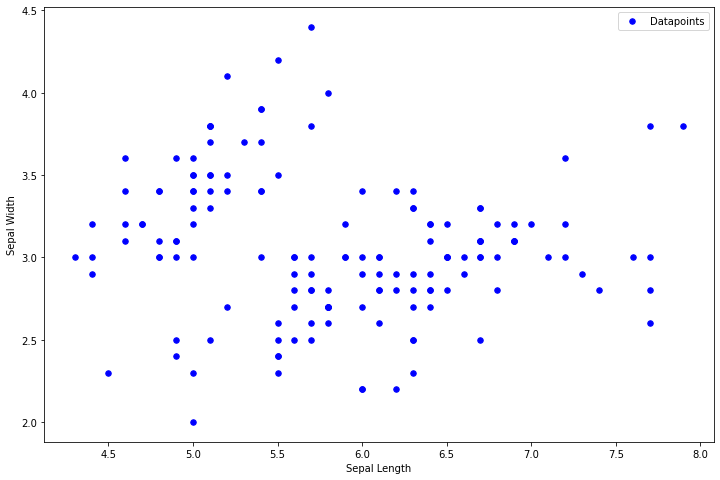

In [14]:

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0],X[:,1], s=30, color='b', label='Datapoints')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend()


### Plotting the clusters

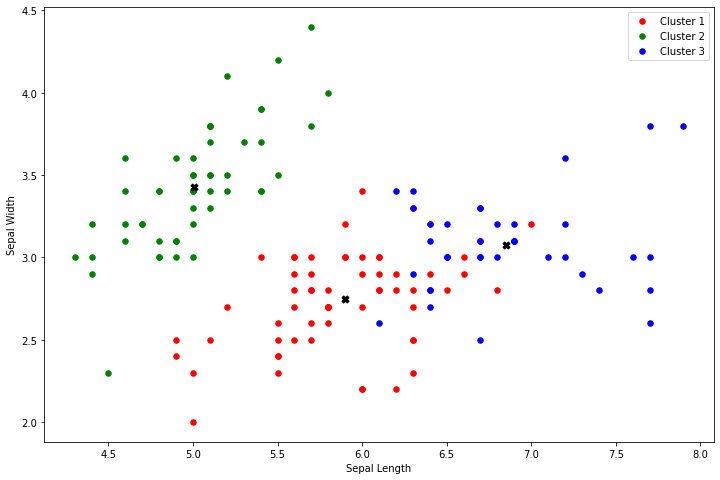

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(centroids[:,0],centroids[:,1], color = 'black', marker='X',s=50)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend()

### Plotting Iris Data : Petal Length - Petal Width

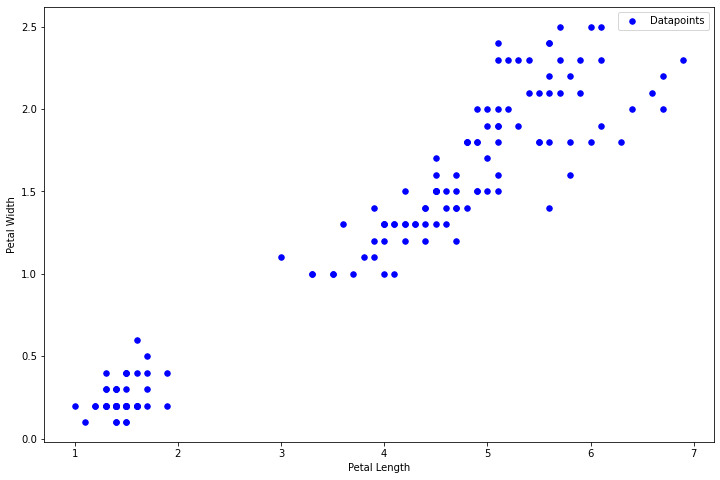

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,2],X[:,3], s=30, color='b', label='Datapoints')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.legend()

### Plotting the clusters

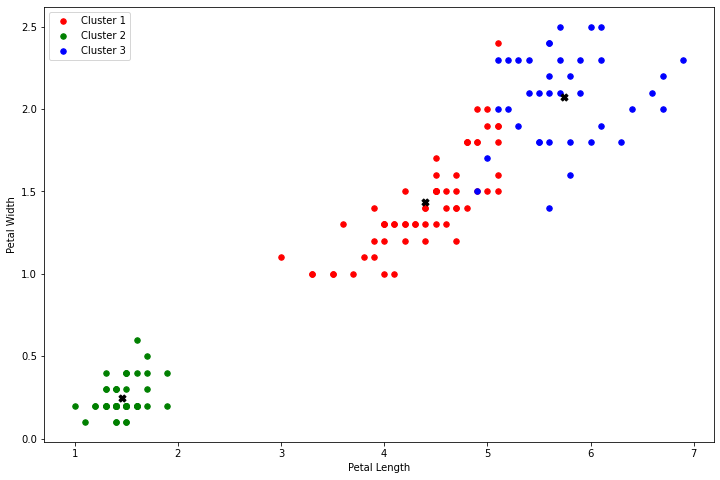

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,2], cluster1[:,3], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,2], cluster2[:,3], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,2], cluster3[:,3], s=30, color='b', label='Cluster 3')
ax.scatter(centroids[:,2],centroids[:,3], color = 'black', marker='X',s=50)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.legend()

In [28]:
def run_k_means(X, first_centroids, iter_num):
    p, q = X.shape
    k = first_centroids.shape[0]
    idx = np.zeros(p)
    # first centroid:selected randomly
    centroids = first_centroids
    
    for i in range(iter_num):
        # find centroid
        idx = centroid.find_centroids(X, centroids)
        #update centroids
        centroids = centroid.compute_centroids(X, idx, k)
    
    return idx, centroids

In [85]:
X = np.array([[0,3],[0,4],[0,5],[0,6],[1,6],[2,1],[2,2],[2,3],[2,4],[2,6],[3,1],[3,6],[4,1],[4,3],[4,4],[4,5],[4,6],
              [5,1],[6,1],[6,2],[6,3],[6,4]])


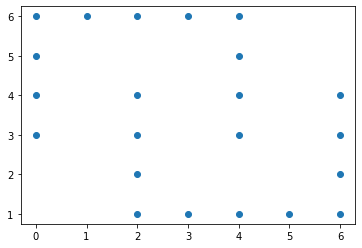

In [86]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [89]:
import random

#from the shuffled data, we are selecting 3 random centroids
first_centroids = np.array([[5,21],[5,-14]])
first_centroids

array([[  5,  21],
       [  5, -14]])

In [90]:
idx, centroids = run_k_means(X, first_centroids, 1)
print('Labels are:\n',centroids)

Labels are:
 [[2.36363636 5.09090909]
 [3.63636364 1.90909091]]


In [81]:
idx

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1.])

In [82]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]

In [83]:
cluster1

array([[  2, 100]])

In [84]:
cluster2

array([[  0,   3],
       [  0,   4],
       [  0,   5],
       [  0,   6],
       [  1,   6],
       [  2,   1],
       [  2,   2],
       [  2,   3],
       [  2,   4],
       [  2,   6],
       [  3,   1],
       [  3,   6],
       [  4,   1],
       [  4,   3],
       [  4,   4],
       [  4,   5],
       [  4,   6],
       [  5,   1],
       [  6,   1],
       [  6,   2],
       [  6,   3],
       [  6,   4],
       [  2, -30]])